In [2]:
from fastai.vision import *
from sklearn.model_selection import StratifiedKFold
from fastai.callbacks import *
from fastai.tabular import *

from custom_nets import ImageTabularModel_YPR

In [3]:
raw_image_base_path = '/disks/data/paper_projects/selfie_detection/data/DS_224_all_features_no_duplicates/raw_image/'

# image with skeleton base paths
im_skel_base_path = '/disks/data/paper_projects/selfie_detection/data/DS_224_all_features_no_duplicates/color_skeleton/im+skeleton/'
skel_base_path = '/disks/data/paper_projects/selfie_detection/data/DS_224_all_features_no_duplicates/color_skeleton/skeleton/'

# masked image base path
im_masked_base_path = '/disks/data/paper_projects/selfie_detection/data/DS_224_all_features_no_duplicates/maskRCNN_segmentation/masked/'

# dlib points-drawn image base paths
blank_dlib_base_path = '/disks/data/paper_projects/selfie_detection/data/DS_224_all_features_no_duplicates/dlib_images/dlib/'
im_dlib_base_path = '/disks/data/paper_projects/selfie_detection/data/DS_224_all_features_no_duplicates/dlib_images/im+dlib/'
skel_dlib_base_path = '/disks/data/paper_projects/selfie_detection/data/DS_224_all_features_no_duplicates/dlib_images/skel+dlib/'
im_skel_dlib_base_path = '/disks/data/paper_projects/selfie_detection/data/DS_224_all_features_no_duplicates/dlib_images/im+skel+dlib/'


# csv containing raw image names, yaw-pitch-roll, dlib points, skeleton image names, im+skeleton image names, and masked image names
all_images_YPR_dlib_csv_file_base_path = \
        '/disks/data/paper_projects/selfie_detection/data/DS_224_all_features_no_duplicates/CSVs/with_test_set/'

In [4]:
# d = {3:'Hello', 5:'No'}
# d[3]

In [5]:
class_names = ['selfie', 'non_selfie', 'mirror_selfie', 'non_mirror_selfie']

class_configs = {'selfie_vs_no_selfie'   : (('selfie',),('non_selfie',)), 
                 'selfie__mirror_vs_non_selfie___non_mirrror': (('selfie','mirror_selfie'),('non_selfie','non_mirror_selfie'))}

feature_configs = {'im,skeleton,YPR'  : {'image_data':('im_name','skeleton'),  'num_data':('yaw','pitch','roll')},
                   'im'               : {'image_data':('im_name',),            'num_data':()},
                   'skeleton'         : {'image_data':('skeleton',),           'num_data':()},                   
                   'im_skeleton'      : {'image_data':('im_skeleton',),        'num_data':()},
                   'im_masked'        : {'image_data':('im_masked',),          'num_data':()},
                   'im_skeleton,YPR'  : {'image_data':('im_skeleton',),        'num_data':('yaw','pitch','roll')},
                   'skeleton,YPR'     : {'image_data':('skeleton',),           'num_data':('yaw','pitch','roll')},                   
                   'im_dlib,YPR'      : {'image_data':('im_dlib',),            'num_data':('yaw','pitch','roll')},
                   'skel_dlib,YPR'    : {'image_data':('skel_dlib',),          'num_data':('yaw','pitch','roll')},
                   'im_skel_dlib,YPR' : {'image_data':('im_skel_dlib',),       'num_data':('yaw','pitch','roll')},
                   'blank_dlib,YPR'   : {'image_data':('dlib',),               'num_data':('yaw','pitch','roll')},
                  }

image_paths = {'im': [raw_image_base_path], 'skeleton':[skel_base_path], 'im_skeleton':[im_skel_base_path], 'im_masked': [im_masked_base_path],
               'im_skeleton,YPR': [im_skel_base_path], 'skeleton,YPR': [skel_base_path], 
               'im_dlib,YPR': [im_dlib_base_path], 'skel_dlib,YPR': [skel_dlib_base_path], 'im_skel_dlib,YPR': [im_skel_dlib_base_path], 'blank_dlib,YPR': [blank_dlib_base_path],
               'im,skeleton,YPR':[raw_image_base_path, skel_base_path]}

custom_network_architectures = {'ImageTabularModel_YPR':      ImageTabularModel_YPR(3, [models.resnet34]), 
                                'ImageTabularModel_YPR_dlib': ImageTabularModel_YPR(139, [models.resnet34])}


network_architectures = {'im':(models.resnet50, models.densenet201, models.vgg19_bn),
                         'im_skeleton,YPR':custom_network_architectures['ImageTabularModel_YPR']
                        }



# feature          -> column name in DF
#---------------------------------------
# raw image        -> im_name
# skeleton only    -> skeleton
# image+skeleton   -> im_skeleton
# masked image     -> im_masked
# blank im+dlib    -> dlib
# raw image+dlib   -> im_dlib
# skeleton+dlib    -> skel_dlib
# im+sleleton+dlib -> im_skel_dlib
# yaw              -> yaw
# pitch            -> pitch
# roll             -> roll
# dlib pts         -> x_1, y_1, ... , x_68, y_68


# csv.columns

In [6]:
class_config = class_configs['selfie__mirror_vs_non_selfie___non_mirrror'] # 'selfie_vs_no_selfie' or 'selfie__mirror_vs_non_selfie___non_mirrror'
#class_config = class_configs['selfie__mirror_vs_non_selfie___non_mirrror']
feature_config_label = 'im'
feature_config = feature_configs[feature_config_label]

net_arch_idx = 0  # change index to select a different architecture 
network_architecture = network_architectures[feature_config_label][net_arch_idx] 

class_dataframes = {}

for class_name in class_names:
    csv = pd.read_csv(all_images_YPR_dlib_csv_file_base_path+class_name+'_with_testet.csv')
    #csv.insert(0, column = 'class_label',value = len(csv.index)*[f"{class_name}"])
    for i, im_feature_col in enumerate(feature_config['image_data']):        
        csv[f'path_{i:02d}'] = csv.class_label + '/' + csv[im_feature_col]
        #csv = csv.drop(['filename'], axis = 1)
    
    class_dataframes[class_name] = csv
        #print(csv.columns)
        #csv.head()


In [7]:
csv.head()

,class_label,im_name,x_min,y_min,x_max,y_max,confidence_score,yaw,pitch,roll,...,y_68,skeleton,im_skeleton,im_masked,dlib,im_dlib,skel_dlib,im_skel_dlib,is_test,path_00
0,non_mirror_selfie,google_medium_shot__091218_000366.jpg,127.252274,21.056339,174.173325,87.756042,NaN,19.890358,-1.958405,-3.861748,...,54,google_medium_shot__091218_000366.jpg_skeleton...,google_medium_shot__091218_000366.jpg_im_skele...,google_medium_shot__091218_000366.jpg_masked.jpg,google_medium_shot__091218_000366_dlib_only.jpg,google_medium_shot__091218_000366_dlib.jpg,google_medium_shot__091218_000366.jpg_skeleton...,google_medium_shot__091218_000366.jpg_im_skele...,0,non_mirror_selfie/google_medium_shot__091218_0...
1,non_mirror_selfie,33552410122_259de543ac_c.jpg,154.158478,34.147541,194.528900,112.014954,NaN,31.271103,-5.884987,-0.528885,...,69,33552410122_259de543ac_c.jpg_skeleton.jpg,33552410122_259de543ac_c.jpg_im_skeleton.jpg,33552410122_259de543ac_c.jpg_masked.jpg,33552410122_259de543ac_c_dlib_only.jpg,33552410122_259de543ac_c_dlib.jpg,33552410122_259de543ac_c.jpg_skeleton_dlib.jpg,33552410122_259de543ac_c.jpg_im_skeleton_dlib.jpg,0,non_mirror_selfie/33552410122_259de543ac_c.jpg
2,non_mirror_selfie,25868529662_0c2f2a9c4d_c.jpg,141.901276,40.398277,181.698364,91.785027,NaN,26.729370,-20.036217,-7.504082,...,62,25868529662_0c2f2a9c4d_c.jpg_skeleton.jpg,25868529662_0c2f2a9c4d_c.jpg_im_skeleton.jpg,25868529662_0c2f2a9c4d_c.jpg_masked.jpg,25868529662_0c2f2a9c4d_c_dlib_only.jpg,25868529662_0c2f2a9c4d_c_dlib.jpg,25868529662_0c2f2a9c4d_c.jpg_skeleton_dlib.jpg,25868529662_0c2f2a9c4d_c.jpg_im_skeleton_dlib.jpg,0,non_mirror_selfie/25868529662_0c2f2a9c4d_c.jpg
3,non_mirror_selfie,30738311065_c2857052e1_c.jpg,181.442871,81.344231,219.008331,148.781860,NaN,30.532150,18.398369,10.353668,...,97,30738311065_c2857052e1_c.jpg_skeleton.jpg,30738311065_c2857052e1_c.jpg_im_skeleton.jpg,30738311065_c2857052e1_c.jpg_masked.jpg,30738311065_c2857052e1_c_dlib_only.jpg,30738311065_c2857052e1_c_dlib.jpg,30738311065_c2857052e1_c.jpg_skeleton_dlib.jpg,30738311065_c2857052e1_c.jpg_im_skeleton_dlib.jpg,1,non_mirror_selfie/30738311065_c2857052e1_c.jpg
4,non_mirror_selfie,google_medium_long_shot_photo_091218_000002.jpg,138.950684,38.436363,168.078674,77.191185,NaN,4.198860,-6.403030,-0.754364,...,105,google_medium_long_shot_photo_091218_000002.jp...,google_medium_long_shot_photo_091218_000002.jp...,google_medium_long_shot_photo_091218_000002.jp...,google_medium_long_shot_photo_091218_000002_dl...,google_medium_long_shot_photo_091218_000002_dl...,google_medium_long_shot_photo_091218_000002.jp...,google_medium_long_shot_photo_091218_000002.jp...,0,non_mirror_selfie/google_medium_long_shot_phot...


In [8]:
[class_dataframe.shape for _, class_dataframe in class_dataframes.items()], class_dataframes.keys()

([(1217, 159), (1176, 159), (1171, 159), (1211, 159)],
 dict_keys(['selfie', 'non_selfie', 'mirror_selfie', 'non_mirror_selfie']))

In [9]:
class_config
class_01_labels = class_config[0]
class_02_labels = class_config[1]

class_01_labels, class_02_labels 

(('selfie', 'mirror_selfie'), ('non_selfie', 'non_mirror_selfie'))

In [10]:
# [class_dataframes[class_name].shape for class_name in class_names] 

In [11]:
class_01_df = class_dataframes[class_01_labels[0]]
for i,pos_class_label in enumerate(class_01_labels[1:]):
    class_01_df = class_01_df.append(class_dataframes[class_01_labels[i]])

class_02_df = class_dataframes[class_02_labels[0]]    
for i,neg_class_label in enumerate(class_02_labels[1:]):
    class_02_df = class_02_df.append(class_dataframes[class_02_labels[i]])

#selfie_df = class_dataframes['selfie'].sample(n=len(class_dataframes['non_selfie'].index), replace=False, random_state=4, axis=0)

print(class_01_df.shape, class_02_df.shape)
#newdf = class_dataframes['selfie'].copy().append(class_dataframes['non_selfie'])
all_class_df = class_01_df.append(class_02_df)

(2434, 159) (2352, 159)


In [12]:
print(all_class_df.shape)
all_class_df.head()

(4786, 159)


,class_label,im_name,x_min,y_min,x_max,y_max,confidence_score,yaw,pitch,roll,...,y_68,skeleton,im_skeleton,im_masked,dlib,im_dlib,skel_dlib,im_skel_dlib,is_test,path_00
0,selfie,selfie_mshah_0002888.jpg,51.794823,7.731789,167.835022,149.212799,NaN,12.702850,-17.375320,-20.544289,...,87,selfie_mshah_0002888.jpg_skeleton.jpg,selfie_mshah_0002888.jpg_im_skeleton.jpg,selfie_mshah_0002888.jpg_masked.jpg,selfie_mshah_0002888_dlib_only.jpg,selfie_mshah_0002888_dlib.jpg,selfie_mshah_0002888.jpg_skeleton_dlib.jpg,selfie_mshah_0002888.jpg_im_skeleton_dlib.jpg,0,selfie/selfie_mshah_0002888.jpg
1,selfie,selfie_mshah_0000260.jpg,80.503311,81.839630,205.567429,242.020813,NaN,-1.656120,-22.516785,-5.354843,...,158,selfie_mshah_0000260.jpg_skeleton.jpg,selfie_mshah_0000260.jpg_im_skeleton.jpg,selfie_mshah_0000260.jpg_masked.jpg,selfie_mshah_0000260_dlib_only.jpg,selfie_mshah_0000260_dlib.jpg,selfie_mshah_0000260.jpg_skeleton_dlib.jpg,selfie_mshah_0000260.jpg_im_skeleton_dlib.jpg,0,selfie/selfie_mshah_0000260.jpg
2,selfie,selfie_mshah_0038322.jpg,99.380798,42.433990,219.251373,208.734207,NaN,1.438683,-10.838379,-1.524521,...,128,selfie_mshah_0038322.jpg_skeleton.jpg,selfie_mshah_0038322.jpg_im_skeleton.jpg,selfie_mshah_0038322.jpg_masked.jpg,selfie_mshah_0038322_dlib_only.jpg,selfie_mshah_0038322_dlib.jpg,selfie_mshah_0038322.jpg_skeleton_dlib.jpg,selfie_mshah_0038322.jpg_im_skeleton_dlib.jpg,0,selfie/selfie_mshah_0038322.jpg
3,selfie,selfie_mshah_0038357.jpg,90.119972,78.243149,234.852600,271.807312,NaN,6.548569,0.761742,6.543167,...,167,selfie_mshah_0038357.jpg_skeleton.jpg,selfie_mshah_0038357.jpg_im_skeleton.jpg,selfie_mshah_0038357.jpg_masked.jpg,selfie_mshah_0038357_dlib_only.jpg,selfie_mshah_0038357_dlib.jpg,selfie_mshah_0038357.jpg_skeleton_dlib.jpg,selfie_mshah_0038357.jpg_im_skeleton_dlib.jpg,0,selfie/selfie_mshah_0038357.jpg
4,selfie,selfie_tag_11316283405_d8fd776a2b_c.jpg,94.707085,74.440269,213.292572,216.627594,NaN,3.877739,6.659058,0.466476,...,137,selfie_tag_11316283405_d8fd776a2b_c.jpg_skelet...,selfie_tag_11316283405_d8fd776a2b_c.jpg_im_ske...,selfie_tag_11316283405_d8fd776a2b_c.jpg_masked...,selfie_tag_11316283405_d8fd776a2b_c_dlib_only.jpg,selfie_tag_11316283405_d8fd776a2b_c_dlib.jpg,selfie_tag_11316283405_d8fd776a2b_c.jpg_skelet...,selfie_tag_11316283405_d8fd776a2b_c.jpg_im_ske...,0,selfie/selfie_tag_11316283405_d8fd776a2b_c.jpg


In [13]:
if(len(feature_config['num_data'])>0):
    
    def _normalize_images_batch(b:Tuple[Tensor,Tensor], mean:FloatTensor, std:FloatTensor)->Tuple[Tensor,Tensor]:
        "`b` = `x`,`y` - normalize `x` array of imgs and `do_y` optionally `y`."
        x,y = b
        mean,std = mean.to(x[0].device),std.to(x[0].device)
        x[0] = normalize(x[0],mean,std)
        return x,y

    def normalize_custom_funcs(mean:FloatTensor, std:FloatTensor, do_x:bool=True, do_y:bool=False)->Tuple[Callable,Callable]:
        "Create normalize/denormalize func using `mean` and `std`, can specify `do_y` and `device`."
        mean,std = tensor(mean),tensor(std)
        return (partial(_normalize_images_batch, mean=mean, std=std),
                partial(denormalize, mean=mean, std=std))

    # doc(MixedItemList)
    #image_paths[feature_config_label][used_cnn_idx]

    max_allowed_backbones = 1
    
    imgLists = []
    for i in range(max_allowed_backbones):
        imgLists.append(ImageList.from_df(all_class_df, path = image_paths[feature_config_label][i], cols=f'path_{i:02d}'))

    tabList = TabularList.from_df(newdf, cat_names=[], cont_names = feature_config['num_data'], procs=[Normalize])

    mixed = MixedItemList([imgLists[0], tabList], image_paths[feature_config_label][i], inner_df=imgLists[0].inner_df)\
    .split_by_rand_pct(.2)\
    .label_from_df(cols='class_label')
    #.transform([[get_transforms()[0], []], [get_transforms()[1], []]], size=224)

    data = mixed.databunch(no_check=True, bs=64, num_workers=0) # num_workers=0 here just to get errors more quickly

else:
    
    test_df = all_class_df[all_class_df['is_test']==1]
    test_df = test_df.reset_index(drop = True)
    train_val_df = all_class_df[all_class_df['is_test']==0]
    train_val_df = train_val_df.reset_index(drop = True)
    

In [14]:
print(len(test_df.index))
print(len(train_val_df.index))

#     data = (ImageList.from_df(all_class_df, path = image_paths[feature_config_label][used_cnn_idx], cols=f'path_{used_cnn_idx:02d}')\
#                        .split_from_df(col='is_test')\
#                        .label_from_df(cols='class_label')\
#                        .transform(get_transforms())\
#                        .databunch()\
#                        ).normalize(imagenet_stats)
    

936
3850


In [15]:
# len(data.train_ds)

In [ ]:
# len(data.valid_ds)

In [ ]:
# data.classes

In [15]:
# K-fold cross validation

image_paths[feature_config_label][0]

train_val_df.head()

,class_label,im_name,x_min,y_min,x_max,y_max,confidence_score,yaw,pitch,roll,...,y_68,skeleton,im_skeleton,im_masked,dlib,im_dlib,skel_dlib,im_skel_dlib,is_test,path_00
0,selfie,selfie_mshah_0002888.jpg,51.794823,7.731789,167.835022,149.212799,NaN,12.702850,-17.375320,-20.544289,...,87,selfie_mshah_0002888.jpg_skeleton.jpg,selfie_mshah_0002888.jpg_im_skeleton.jpg,selfie_mshah_0002888.jpg_masked.jpg,selfie_mshah_0002888_dlib_only.jpg,selfie_mshah_0002888_dlib.jpg,selfie_mshah_0002888.jpg_skeleton_dlib.jpg,selfie_mshah_0002888.jpg_im_skeleton_dlib.jpg,0,selfie/selfie_mshah_0002888.jpg
1,selfie,selfie_mshah_0000260.jpg,80.503311,81.839630,205.567429,242.020813,NaN,-1.656120,-22.516785,-5.354843,...,158,selfie_mshah_0000260.jpg_skeleton.jpg,selfie_mshah_0000260.jpg_im_skeleton.jpg,selfie_mshah_0000260.jpg_masked.jpg,selfie_mshah_0000260_dlib_only.jpg,selfie_mshah_0000260_dlib.jpg,selfie_mshah_0000260.jpg_skeleton_dlib.jpg,selfie_mshah_0000260.jpg_im_skeleton_dlib.jpg,0,selfie/selfie_mshah_0000260.jpg
2,selfie,selfie_mshah_0038322.jpg,99.380798,42.433990,219.251373,208.734207,NaN,1.438683,-10.838379,-1.524521,...,128,selfie_mshah_0038322.jpg_skeleton.jpg,selfie_mshah_0038322.jpg_im_skeleton.jpg,selfie_mshah_0038322.jpg_masked.jpg,selfie_mshah_0038322_dlib_only.jpg,selfie_mshah_0038322_dlib.jpg,selfie_mshah_0038322.jpg_skeleton_dlib.jpg,selfie_mshah_0038322.jpg_im_skeleton_dlib.jpg,0,selfie/selfie_mshah_0038322.jpg
3,selfie,selfie_mshah_0038357.jpg,90.119972,78.243149,234.852600,271.807312,NaN,6.548569,0.761742,6.543167,...,167,selfie_mshah_0038357.jpg_skeleton.jpg,selfie_mshah_0038357.jpg_im_skeleton.jpg,selfie_mshah_0038357.jpg_masked.jpg,selfie_mshah_0038357_dlib_only.jpg,selfie_mshah_0038357_dlib.jpg,selfie_mshah_0038357.jpg_skeleton_dlib.jpg,selfie_mshah_0038357.jpg_im_skeleton_dlib.jpg,0,selfie/selfie_mshah_0038357.jpg
4,selfie,selfie_tag_11316283405_d8fd776a2b_c.jpg,94.707085,74.440269,213.292572,216.627594,NaN,3.877739,6.659058,0.466476,...,137,selfie_tag_11316283405_d8fd776a2b_c.jpg_skelet...,selfie_tag_11316283405_d8fd776a2b_c.jpg_im_ske...,selfie_tag_11316283405_d8fd776a2b_c.jpg_masked...,selfie_tag_11316283405_d8fd776a2b_c_dlib_only.jpg,selfie_tag_11316283405_d8fd776a2b_c_dlib.jpg,selfie_tag_11316283405_d8fd776a2b_c.jpg_skelet...,selfie_tag_11316283405_d8fd776a2b_c.jpg_im_ske...,0,selfie/selfie_tag_11316283405_d8fd776a2b_c.jpg


================= fold 1 ===========================
['non_selfie', 'selfie'] 2 1731 194


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.621598,0.392590,0.164948,0.835052,00:09
1,0.426231,0.435403,0.190722,0.809278,00:09
2,0.329266,0.334140,0.134021,0.865979,00:09
3,0.256180,0.309343,0.134021,0.865979,00:09
4,0.185525,0.282501,0.113402,0.886598,00:09
5,0.140141,0.280380,0.103093,0.896907,00:09
6,0.107423,0.275068,0.113402,0.886598,00:09
7,0.087920,0.283353,0.103093,0.896907,00:09


Epoch 8: early stopping


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.065728,0.260966,0.108247,0.891753,00:12
1,0.074875,0.273966,0.108247,0.891753,00:12


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.087594,0.304372,0.103093,0.896907,00:12
1,0.091103,0.280849,0.103093,0.896907,00:12


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.083566,0.272247,0.103093,0.896907,00:11
1,0.070938,0.302159,0.097938,0.902062,00:12
2,0.055707,0.269562,0.113402,0.886598,00:12
3,0.041704,0.288250,0.108247,0.891753,00:12


Epoch 4: early stopping
================= fold 2 ===========================
['non_selfie', 'selfie'] 2 1731 194


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.589296,0.404737,0.139175,0.860825,00:09
1,0.403231,0.352159,0.123711,0.876289,00:09
2,0.315500,0.428718,0.128866,0.871134,00:09
3,0.257990,0.294201,0.097938,0.902062,00:09
4,0.203493,0.362856,0.128866,0.871134,00:09
5,0.158709,0.314086,0.108247,0.891753,00:09
6,0.107644,0.274793,0.082474,0.917526,00:09
7,0.090406,0.294562,0.087629,0.912371,00:09
8,0.078177,0.288384,0.097938,0.902062,00:09
9,0.070350,0.270609,0.077320,0.922680,00:09


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.058850,0.263738,0.072165,0.927835,00:12
1,0.061975,0.292493,0.103093,0.896907,00:12


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.110588,0.456892,0.128866,0.871134,00:12
1,0.097079,0.247040,0.087629,0.912371,00:12


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.060600,0.252060,0.072165,0.927835,00:12
1,0.063717,0.219202,0.082474,0.917526,00:12
2,0.049528,0.228750,0.077320,0.922680,00:12


Epoch 3: early stopping
================= fold 3 ===========================
['non_selfie', 'selfie'] 2 1732 193


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.595158,0.365845,0.165803,0.834197,00:09
1,0.428728,0.355302,0.119171,0.880829,00:09
2,0.350757,0.321591,0.098446,0.901554,00:09
3,0.258227,0.326128,0.124352,0.875648,00:09
4,0.192515,0.374416,0.134715,0.865285,00:09


Epoch 5: early stopping


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.102204,0.336270,0.119171,0.880829,00:12
1,0.098195,0.319193,0.113990,0.886010,00:12


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.111588,0.314305,0.113990,0.886010,00:12
1,0.096578,0.311980,0.103627,0.896373,00:12


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.065281,0.302269,0.108808,0.891192,00:12
1,0.058192,0.314544,0.108808,0.891192,00:12
2,0.064979,0.317465,0.113990,0.886010,00:12
3,0.052624,0.286508,0.098446,0.901554,00:12
4,0.054701,0.289656,0.103627,0.896373,00:12


================= fold 4 ===========================
['non_selfie', 'selfie'] 2 1733 192


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.616112,0.295086,0.135417,0.864583,00:09
1,0.439085,0.194953,0.067708,0.932292,00:09
2,0.327692,0.200001,0.072917,0.927083,00:09
3,0.260848,0.211238,0.057292,0.942708,00:09
4,0.190135,0.186700,0.062500,0.937500,00:09
5,0.154737,0.172292,0.046875,0.953125,00:09
6,0.119749,0.166152,0.057292,0.942708,00:09
7,0.098879,0.149558,0.052083,0.947917,00:09


Epoch 8: early stopping


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.058803,0.151317,0.046875,0.953125,00:12
1,0.066784,0.160697,0.052083,0.947917,00:12


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.094435,0.182744,0.067708,0.932292,00:12
1,0.100255,0.205203,0.072917,0.927083,00:12


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.056962,0.192424,0.067708,0.932292,00:11
1,0.054678,0.166539,0.067708,0.932292,00:12
2,0.053665,0.158952,0.052083,0.947917,00:12
3,0.048064,0.168347,0.072917,0.927083,00:12
4,0.045660,0.149496,0.057292,0.942708,00:12


================= fold 5 ===========================
['non_selfie', 'selfie'] 2 1733 192


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.549357,0.471328,0.203125,0.796875,00:09
1,0.382657,0.421629,0.130208,0.869792,00:09
2,0.345261,0.343799,0.140625,0.859375,00:09
3,0.256710,0.397959,0.161458,0.838542,00:09


Epoch 4: early stopping


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.093841,0.316169,0.135417,0.864583,00:12
1,0.095190,0.321302,0.135417,0.864583,00:12


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.168534,0.509498,0.177083,0.822917,00:12
1,0.113980,0.387314,0.125000,0.875000,00:12


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.076854,0.385092,0.119792,0.880208,00:12
1,0.065562,0.365771,0.114583,0.885417,00:12
2,0.054591,0.363358,0.119792,0.880208,00:12
3,0.051661,0.397515,0.119792,0.880208,00:12
4,0.048108,0.361139,0.109375,0.890625,00:12


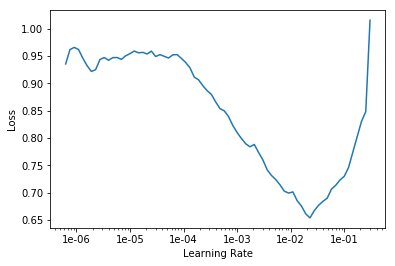

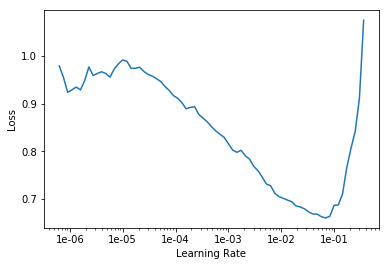

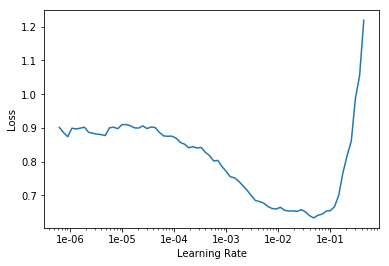

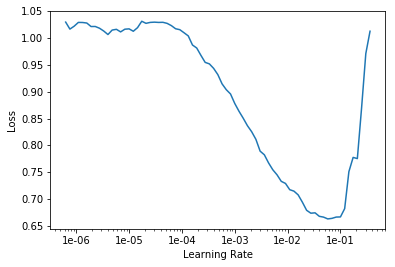

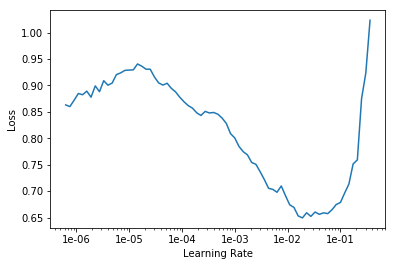

In [21]:
n_folds = 10

skf = StratifiedKFold( n_splits = n_folds, shuffle=True, random_state=1)

fold = 0
learners = []
for train_idxs, val_idxs in skf.split(train_val_df.index, train_val_df['class_label']):
    
    fold += 1

    print('======================================================')
    print(f'================= fold {fold} ===========================')
    
    data_fold = (ImageList.from_df(train_val_df, image_paths[feature_config_label][0], cols=f'path_{0:02d}')
                    .split_by_idxs(train_idxs, val_idxs)
                    .label_from_df(cols='class_label')
                    .transform(get_transforms())
                    .databunch(bs=32) 
                ).normalize(imagenet_stats)
    
    print(data_fold.classes, data_fold.c, len(data_fold.train_ds), len(data_fold.valid_ds))
    learn = cnn_learner(data_fold, network_architecture, metrics=[error_rate, accuracy],callback_fns=[partial(EarlyStoppingCallback, monitor='accuracy', min_delta=0.0001, patience=2)]);
    
    
    learn.lr_find()
    learn.recorder.plot()
    
    learn.fit_one_cycle(10, 1e-3, callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy')])    # every='epoch' to save after each epoch 
    learn.save(f'stage-1_CV_fold_{fold:02d}')

    learn.unfreeze()
    
    learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-5/3), callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy')])
    learn.save(f'stage-2a_CV_fold_{fold:02d}')
    
    learn.load(f'stage-1_CV_fold_{fold:02d}')
    learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-4/3), callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy')])
    learn.save(f'stage-2b_CV_fold_{fold:02d}')
    
    learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-5/3), callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy')])
    learn.save(f'stage-3_CV_fold_{fold:02d}')
    
    #loss, acc = learn.validate()
    #print(acc)
    learners.append(learn)

    if(fold==5):
        break

[[0.968085 0.031915]
 [0.183673 0.816327]]


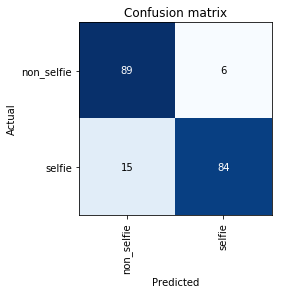

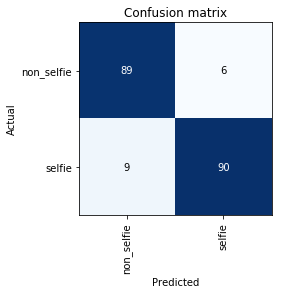

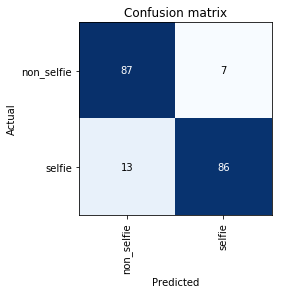

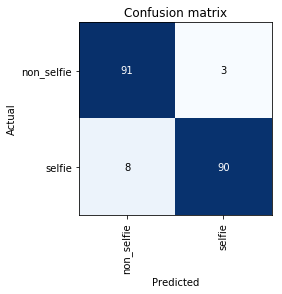

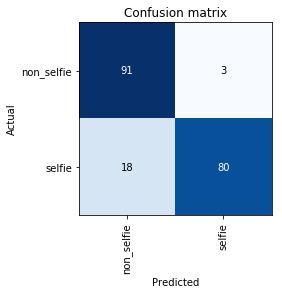

In [23]:
confusion_matrices = []
for learn in learners:
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix()
    
    confusion_mat = interp.confusion_matrix()
    confusion_matrices.append(confusion_mat)
    print(confusion_mat/np.sum(confusion_mat, axis = 1).reshape(-1,1))


In [25]:
for confusion_mat in confusion_matrices:
    print(confusion_mat)
    print(confusion_mat/np.sum(confusion_mat, axis = 1).reshape(-1,1))
    
# plt.figure()
# interp.plot_confusion_matrix()

# confusion_mat = interp.confusion_matrix()
# print(confusion_mat/np.sum(confusion_mat, axis = 1).reshape(-1,1))

[[89  6]
 [15 84]]
[[0.936842 0.063158]
 [0.151515 0.848485]]
[[89  6]
 [ 9 90]]
[[0.936842 0.063158]
 [0.090909 0.909091]]
[[87  7]
 [13 86]]
[[0.925532 0.074468]
 [0.131313 0.868687]]
[[91  3]
 [ 8 90]]
[[0.968085 0.031915]
 [0.081633 0.918367]]
[[91  3]
 [18 80]]
[[0.968085 0.031915]
 [0.183673 0.816327]]


In [26]:
# average per-class accuracy
summed_conf_mat = np.array(confusion_matrices).sum(axis=0).squeeze()
print(summed_conf_mat/np.sum(summed_conf_mat, axis = 1).reshape(-1,1))

[[0.947034 0.052966]
 [0.127789 0.872211]]


In [ ]:
norm, denorm = normalize_custom_funcs(*imagenet_stats)
data.add_tfm(norm) # normalize images

In [ ]:
# item, labels = next(iter(data.train_dl))

In [ ]:
# # item[1][0], item[1][1]
# mixed.train.x.item_lists[1].get_emb_szs()

In [ ]:
# print(*imagenet_stats)

In [ ]:
# emb = mixed.train.x.item_lists[1].get_emb_szs()

In [ ]:
# from fastai.torch_core import *
# from fastai.vision import *
# from fastai.tabular.models import *
# from fastai.tabular import *
# from fastai.layers import *
# import torch

# class ImageTabularModel(nn.Module):
#     "Basic model for tabular data."
#     def __init__(self, emb_szs:ListSizes, n_cont:int, layers:Collection[int], ps:Collection[float]=None):
#         super().__init__()
#         self.cnn = create_body(models.resnet34)
#         self.tab = TabularModel({}, n_cont, 128, [512, 356]) #TabularModel(emb_szs, n_cont, 512, layers, ps)

#         self.reduce = nn.Sequential(*([Flatten()] + bn_drop_lin((512*7*7), 512, bn=True, p=0.5, actn=nn.ReLU(inplace=True))))
#         self.merge = nn.Sequential(*bn_drop_lin(512 + 512, 1024, bn=True, p=0.5, actn=nn.ReLU(inplace=True)))
#         self.final = nn.Sequential(*bn_drop_lin(1024, 2, bn=True, p=0., actn=nn.ReLU(inplace=True)))

#     def forward(self, img:Tensor, x_cat:Tensor, x_cont:Tensor) -> Tensor:
#         imgLatent = self.reduce(self.cnn(img))
#         tabLatent = self.tab(x_cat, x_cont)

#         cat = torch.cat(imgLatent, tabLatent)

#         return self.final(self.merge(cat))

In [ ]:
def split_layers(model:nn.Module) -> List[nn.Module]:
    groups = [[model.cnn]]
    groups += [[model.tab, model.reduce, model.merge, model.final]]
    return groups

class ImageTabularTextLearner(Learner):
    def __init__(self, data:DataBunch, model:nn.Module, alpha:float=2., beta:float=1., **learn_kwargs):
        super().__init__(data, model, **learn_kwargs)
        self.split(split_layers)

In [ ]:
# class ImageTabularTextModel(nn.Module):
#     def __init__(self, n_cont:int):
#         super().__init__()
#         self.cnn = create_body(models.resnet34)
#         nf = num_features_model(self.cnn) * 2
#         drop = .5

#         self.tab = TabularModel({}, n_cont, 128, [512, 256])

#         self.reduce = nn.Sequential(*([AdaptiveConcatPool2d(), Flatten()] + bn_drop_lin(nf, 512, bn=True, p=drop, actn=nn.ReLU(inplace=True))))
#         self.merge = nn.Sequential(*bn_drop_lin(512 + 128, 128, bn=True, p=drop, actn=nn.ReLU(inplace=True)))
#         self.final = nn.Sequential(*bn_drop_lin(128, 2, bn=False, p=0., actn=None))
#         #self.final = nn.Sequential(*bn_drop_lin(512, 2, bn=False, p=0., actn=None))
#         #print(self)
        
#     def forward(self, img:Tensor, x:Tensor) -> Tensor:
#         #print(img.shape)        
#         imgCnn = self.cnn(img)
#         #print(imgCnn.shape)
#         imgLatent = self.reduce(imgCnn)
#         #print(imgLatent.shape)
#         tabLatent = self.tab(x[0], x[1])
#         #print(tabLatent.shape)
        
#         cat = torch.cat([imgLatent, F.relu(tabLatent)], dim=1)
#         #print(cat.shape)
        
#         pred = self.final(self.merge(cat))
#         #pred = torch.sigmoid(pred)  # making sure this is in the range 0-4
#         #pred = torch.sigmoid(self.final(self.reduce(imgCnn)))
#         #print(pred)
#         return pred #torch.softmax(torxh.zeros(1,2))
        
#     def reset(self):
#         for c in self.children():
#             if hasattr(c, 'reset'): c.reset()

In [ ]:
model = ImageTabularTextModel(3)
learn = ImageTabularTextLearner(data, model, metrics=[error_rate])

In [ ]:
# it = iter(data.valid_dl)
# for item, label in it:
#     print(label)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, .4e-3)

In [ ]:
learn.save('resnet34_stage_1_im_sk_ypr')
# learn.fit_one_cycle(5, .7e-3)
learn.load('resnet34_stage_1_im_sk_ypr');

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1.1e-6,1.1e-6/3))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
confusion_mat = interp.confusion_matrix()
confusion_mat/np.sum(confusion_mat, axis = 1).reshape(-1,1)

In [ ]:
len(data.train_ds), len(data.valid_ds)